In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

labirynth = np.array([
    ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'],
    ['b', ' ', ' ', ' ', 'b', ' ', ' ', ' ', 'b', ' ', ' ', 'b'],
    ['b', 'b', 'b', ' ', ' ', ' ', 'b', ' ', 'b', 'b', ' ', 'b'],
    ['b', ' ', ' ', ' ', 'b', ' ', 'b', ' ', ' ', ' ', ' ', 'b'],
    ['b', ' ', 'b', ' ', 'b', 'b', ' ', ' ', 'b', 'b', ' ', 'b'],
    ['b', ' ', ' ', 'b', 'b', ' ', ' ', ' ', 'b', ' ', ' ', 'b'],
    ['b', ' ', ' ', ' ', ' ', ' ', 'b', ' ', ' ', ' ', 'b', 'b'],
    ['b', ' ', 'b', ' ', ' ', 'b', 'b', ' ', 'b', ' ', ' ', 'b'],
    ['b', ' ', 'b', 'b', 'b', ' ', ' ', ' ', 'b', 'b', ' ', 'b'],
    ['b', ' ', 'b', ' ', 'b', 'b', ' ', 'b', ' ', 'b', ' ', 'b'],
    ['b', ' ', 'b', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'b'],
    ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'],
])

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 3)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=40)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [3]:
def fitness_1(individual):
    x, y = 1, 1
    end_x, end_y = 10, 10
    visited = []
    iters = 0
    # 0 = left, 1 = up, 2 = right, 3 = down
    dist = np.linalg.norm(np.array((10, 10))-np.array((y,x)))
    score = 0
    for i in range(0, len(individual)):
        if x==10 and y==10:
            return labirynth.shape[0]*labirynth.shape[1]*-1, iters
        if individual[i] == 0:
            if (labirynth[y][x-1]!='b') and ((y, x-1) not in visited):
                visited.append((y,x))
                iters += 1
                x -= 1
                if np.linalg.norm(np.array((10, 10))-np.array((y,x))) < dist:
                    score-=1
                else:
                    score+=1
                dist = np.linalg.norm(np.array((10, 10))-np.array((y,x)))  
            else:
                break
        if individual[i] == 1:
            if (labirynth[y-1][x]!='b') and ((y-1, x) not in visited):
                visited.append((y,x))
                iters += 1
                y -= 1
                if np.linalg.norm(np.array((10, 10))-np.array((y,x))) < dist:
                    score-=1
                else:
                    score+=1
                dist = np.linalg.norm(np.array((10, 10))-np.array((y,x)))
            else:
                break
        if individual[i] == 2:
            if (labirynth[y][x+1]!='b') and ((y, x+1) not in visited):
                iters += 1
                visited.append((y,x))
                x += 1
                if np.linalg.norm(np.array((10, 10))-np.array((y,x))) < dist:
                    score-=1
                else:
                    score+=1
                dist = np.linalg.norm(np.array((10, 10))-np.array((y,x)))
            else:
                break
        if individual[i] == 3:
            if (labirynth[y+1][x]!='b') and ((y+1, x) not in visited):
                iters += 1
                visited.append((y,x))
                y += 1
                if np.linalg.norm(np.array((10, 10))-np.array((y,x))) < dist:
                    score-=1
                else:
                    score+=1
                dist = np.linalg.norm(np.array((10, 10))-np.array((y,x))) 
            else:
                break
        
    return score, iters

In [4]:
chrm_1=[2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 0, 0, 0, 3, 1, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 2, 1] 
v1 = fitness_1(chrm_1)
chrm_2=[2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 0, 2, 1, 1, 2, 3, 2, 0, 0, 3, 3, 3, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1]
v2 = fitness_1(chrm_2)
print(v1,v2)

(-144, 20) (-13, 15)


In [5]:
def fitness_2(individual):
    x, y = 1, 1
    end_x, end_y = 10, 10
    visited = []
    iters = 0
    # 0 = left, 1 = up, 2 = right, 3 = down
    score = 0
    boost_0, boost_1, boost_2, boost_3 = 0, 0, 0, 0
    if x < end_x:
        boost_2 = 1
    else:
        boost_0 = 1
    if y < end_y:
        boost_3 = 1
    else:
        boost_1 = 1
        
    for i in range(0, len(individual)):
        if x==10 and y==10:
            return labirynth.shape[0]*labirynth.shape[1]*-1, iters
        if individual[i] == 0:
            if (labirynth[y][x-1]!='b') and ((y, x-1) not in visited):
                score-=1
                score-=boost_0
                visited.append((y,x))
                iters += 1
                x -= 1
            else:
                break
        if individual[i] == 1:
            if (labirynth[y-1][x]!='b') and ((y-1, x) not in visited):
                visited.append((y,x))
                score -= 1
                score-=boost_1
                iters += 1
                y -= 1
            else:
                break
        if individual[i] == 2:
            if (labirynth[y][x+1]!='b') and ((y, x+1) not in visited):
                score -= 1
                score-=boost_2
                iters += 1
                visited.append((y,x))
                x += 1
            else:
                break
        if individual[i] == 3:
            if (labirynth[y+1][x]!='b') and ((y+1, x) not in visited):
                score -= 1
                score-=boost_3
                iters += 1
                visited.append((y,x))
                y += 1
            else:
                break
        
    return score, iters

In [6]:
chrm_1=[2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 0, 0, 0, 3, 1, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 2, 1] 
v1 = fitness_2(chrm_1)
chrm_2=[2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 0, 2, 1, 1, 2, 3, 2, 0, 0, 3, 3, 3, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1]
v2 = fitness_2(chrm_2)
print(v1,v2)

(-144, 20) (-29, 15)


In [7]:
def fitness_1f(pop, ngen):
    start = time.time()

    pop = toolbox.population(n=pop)
    hof = tools.HallOfFame(5)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, stats=stats, halloffame=hof, verbose=False)
    end = time.time()
    print("#######################################")
    print("Fitness 1")
    print("time: ", end - start)
    return pop, logbook, hof

def fitness_2f(pop, ngen):
    start = time.time()
    
    pop = toolbox.population(n=pop)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, stats=stats, halloffame=hof, verbose=False)
    end = time.time()
    print("time: ", end - start)
    return pop, logbook, hof


#######################################
Fitness 1
time:  22.933037519454956
Fitness 1
Best individual is:
[2, 2, 3, 2, 2, 1, 2, 2, 3, 3, 3, 0, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 0, 3, 1, 0, 3, 3, 1, 0, 3, 1, 1, 3, 2, 0, 1, 2, 2, 0] 
with  fitness:
(-144.0, 22.0)
#######################################
Fitness 2
time:  8.52569580078125
Best individual is:
[2, 2, 3, 3, 0, 0, 3, 3, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 0, 3, 3, 2, 2, 2, 2, 1, 1, 3, 0, 2, 0, 0, 3, 2, 1] 
with  fitness:
(-144.0, 30.0)
#######################################


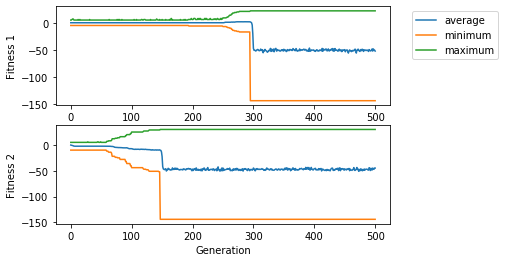

In [8]:
n_pop, n_gen = 200, 500

toolbox.register("evaluate", fitness_1)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=3, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=5)

pop, log, hof = fitness_1f(n_pop, n_gen)

print(f"Best individual is:\n{hof[0]} \nwith  fitness:\n{hof[0].fitness}")
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.subplot(2, 1, 1)
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness 1")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

toolbox.register("evaluate", fitness_2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=3, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=5)

print("#######################################\nFitness 2")
pop, log, hof = fitness_2f(n_pop, n_gen)
print(f"Best individual is:\n{hof[0]} \nwith  fitness:\n{hof[0].fitness}")
print("#######################################")
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.subplot(2, 1, 2)
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness 2")
plt.show()

In [9]:

g = np.ones((12, 12), dtype=np.int8)
g[1] = np.array(['1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1']).astype(int)
g[2] = np.array(['1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1']).astype(int)
g[3] = np.array(['1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1']).astype(int)
g[4] = np.array(['1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1']).astype(int)
g[5] = np.array(['1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1']).astype(int)
g[6] = np.array(['1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1']).astype(int)
g[7] = np.array(['1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1']).astype(int)
g[8] = np.array(['1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1']).astype(int)
g[9] = np.array(['1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1']).astype(int)
g[10] = np.array(['1', '0 ', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1']).astype(int)


In [ ]:
m = Maze()
m.grid = g
m.solver = BacktrackingSolver()
m.start = (1, 1)
m.end = (10, 10)
start = time.time()
m.solve()
end = time.time()
print(end-start)